# DEPARTMENT OF DATA SCIENCE
BISHOP HEBER COLLEGE SOCIAL MEDIA ANALYTICS LAB

CIA 1 SET 8

#### Roll No : 215229109¶

### 1. Install tweepy and necessary libraries

In [1]:
pip install tweepy

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [91]:
import pandas as pd #For reading dataset files
import networkx as nx #For network creation/analysis
from networkx.algorithms import community
import community as community_louvain
import matplotlib.pyplot as plt #For plotting graphs
import igraph as ig
%matplotlib inline

### 2. Access the twitter API using the credentials

In [6]:
import tweepy as tw

# keys and tokens for api authentification
CONSUMER_KEY = 'xCROWGUfeOMMXo6vJaSbmO6Ox'
CONSUMER_SECRET = 'XGK7R1zm7N0jJv5BeNwzjWnT1SdNqlf2bggY7rGpcxRykRJsFc'
ACCESS_KEY = '1552134411256475648-sWiLrFG5X0zbzSgMCCrc7uRhamafPW'
ACCESS_SECRET = 'LMRvs0utn9FWcGGkBKNyOhdefajcCIH1c1J6zq3MUco5k'

auth = tweepy.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET)
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET)
api = tweepy.API(auth)

# verify that the authentification has been carried out properly
try:
    api.verify_credentials()
    print('Successful Authentication')
except:
    print('Successful authentication')

Successful authentication


In [8]:
auth = tw.OAuthHandler(CONSUMER_KEY, CONSUMER_SECRET) 
auth.set_access_token(ACCESS_KEY, ACCESS_SECRET) 
api = tw.API(auth,wait_on_rate_limit=True)

In [10]:
search_terms="#data science -in:retweets" 
 
# your bearer token 
BEARER_TOKEN = "AAAAAAAAAAAAAAAAAAAAAOlNhAEAAAAA%2FuGd7mVQmtpPDcWC2jZqocNLks8%3Dc92pZmKGeFhnmQ6Mm30PxFTuMmNNnIl8QMnncviiMnc5LihilW"
# create your client 
client = tweepy.Client(bearer_token=BEARER_TOKEN)

### 3. Collect tweets of the hashtag #datascience

In [ ]:
search_query = "#data science -in:retweets" 

In [97]:
# query to search for tweets 
query = "#data science" 
# get tweets from the API 
tweets = client. search_recent_tweets(query=query,
                                      tweet_fields = ["created_at", "text", "source"], 
                                      user_fields = ["name", "username", "location"], 
                                    max_results = 20, 
                                    expansions='author_id')


In [98]:
tweets

Response(data=[<Tweet id=1570275667769688065 text="Interested in Data Science? This course will teach you the fundamentals of data science using the R language. You'll be learning about data wrangling, visualizations, and machine learning! https://t.co/oeRIJzecqI #rstat #rladies #datascience #machinelearning #data https://t.co/5OZMZWnh72">, <Tweet id=1570272898362888194 text="End of Covid pandemic is 'in sight': WHO chief https://t.co/oL9JatCsbF #3Novices #Meghashyam Thiruveedula #Data Science #Machine Learning">, <Tweet id=1570272895397670912 text="Patagonia's billionaire owner gives away company to fight climate crisis https://t.co/5n8c01OsQj #3Novices #Meghashyam Thiruveedula #Data Science #Machine Learning">, <Tweet id=1570272857325961216 text='RT @ideas_sharon: Robot Castle Logo for sale\nhttps://t.co/6GYCrDREYT\n\n#robot #Technology #castle #tower #symbol #hitech #science #data #fin…'>, <Tweet id=1570270548781051904 text='RT @RosanaFerrero: 📌 Mis 9 blogs favoritos sobre Data Scie

In [99]:
# import the pandas library 
import pandas as pd 

# create a list of records 
tweet_info_ls = [] 

# iterate over each tweet and corresponding user details 
for tweet, user in zip(tweets.data, tweets.includes['users']): 
    tweet_info = {'created_at': tweet.created_at,
                  'text': tweet.text, 'source': tweet.source,
                  'name': user.name, 'username': user.username,
                  'location': user.location,
                  'verified': user.verified,
                  'description': user.description
                } 
    tweet_info_ls.append(tweet_info) 


In [100]:
# create dataframe from the extracted records 
tweets_df = pd.DataFrame(tweet_info_ls) 
# display the dataframe 
tweets_df.head()

,created_at,text,source,name,username,location,verified,description
0,2022-09-15 04:57:48+00:00,Interested in Data Science? This course will t...,thenewstatistician,TheNewStat,TheNewStat1,None,None,None
1,2022-09-15 04:46:47+00:00,End of Covid pandemic is 'in sight': WHO chief...,IFTTT,3novices,3novices,None,None,None
2,2022-09-15 04:46:47+00:00,Patagonia's billionaire owner gives away compa...,IFTTT,Ideas Studio,ideas_sharon,None,None,None
3,2022-09-15 04:46:38+00:00,RT @ideas_sharon: Robot Castle Logo for sale\n...,Twitter Web App,Twitchi,CodeWithTwitchi,None,None,None
4,2022-09-15 04:37:27+00:00,RT @RosanaFerrero: 📌 Mis 9 blogs favoritos sob...,Twitchi-Twitter-Bot,David Ramos,davidofframos,Nuevo León,None,None


In [101]:
tweets_df['username']

0         TheNewStat1
1            3novices
2        ideas_sharon
3     CodeWithTwitchi
4       davidofframos
           ...       
57     TheCuriousLuke
58    datasciencebot_
59            NMuheko
60         Shyamu_Bot
61            Laluito
Name: username, Length: 62, dtype: object

### 4. Create a network graph of the twitter handles related to the hashtag

In [102]:
! pip install networkx

Defaulting to user installation because normal site-packages is not writeable


In [103]:
import networkx as nx
G = nx.from_pandas_edgelist(tweets_df , 'source', 'name','text') #Turn df into graph
network = nx.spring_layout(G)

In [104]:
network

{'thenewstatistician': array([-0.86494403,  0.17827628]),
 'TheNewStat': array([-0.89393376,  0.20347483]),
 'IFTTT': array([ 0.62294874, -0.56028463]),
 '3novices': array([ 0.56121329, -0.51424075]),
 'Ideas Studio': array([ 0.64471586, -0.61899585]),
 'Twitter Web App': array([0.26432831, 0.66642675]),
 'Twitchi': array([0.21248753, 0.69403636]),
 'Twitchi-Twitter-Bot': array([-0.91882865, -0.21512021]),
 'David Ramos': array([-0.87322027, -0.20295316]),
 'Twitter for Android': array([-0.49923479, -0.55648373]),
 'AMachineLearning': array([-0.45736735, -0.61639373]),
 'AdvanceML': array([-0.09312953, -0.90063054]),
 'Shay Cormac': array([-0.11443527, -0.95060393]),
 'pythonbot007': array([ 0.88540368, -0.13779836]),
 'Rahul': array([ 0.91836402, -0.12161669]),
 'goaidev': array([ 0.3739414 , -0.92189145]),
 'Comidoc': array([ 0.35176985, -0.86590113]),
 'Twitter': array([0.62300354, 0.30540597]),
 'Sydney Health': array([0.64923238, 0.36172142]),
 'Security News': array([0.2642851 , 

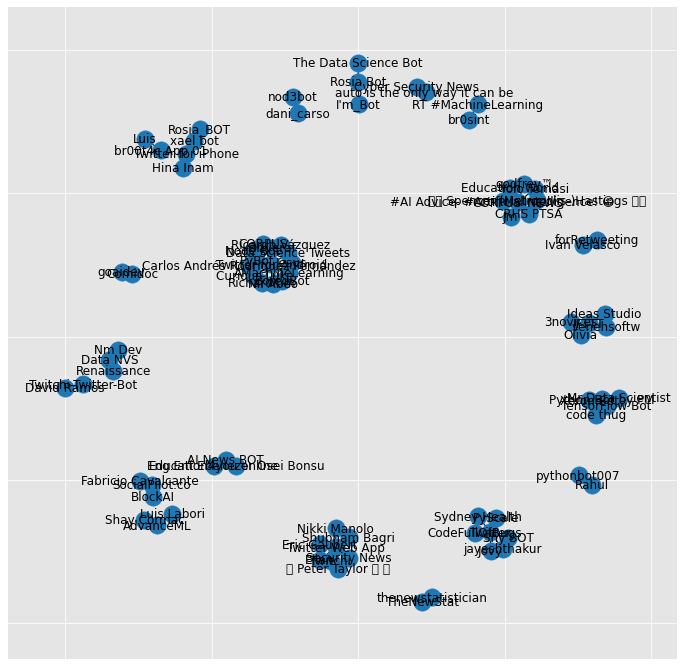

In [107]:
plt.figure(figsize = (12,12))
nx.draw_networkx(G)

### 5. Find the most influential twitter handles in the data science network

In [86]:
tag =str(input("Please enter your hashtag/text: "))

Please enter your hashtag/text: # data science


In [108]:
#sorting data according to influential tweets
tweets_df.sort_values(by=['source'], ascending=False).head(10)

,created_at,text,source,name,username,location,verified,description
42,2022-09-15 01:22:47+00:00,RT @byLilyV: #FEATURED #COURSES\n\nMachine Lea...,xael bot,Rosia_BOT,rosiaXbot,None,None,None
0,2022-09-15 04:57:48+00:00,Interested in Data Science? This course will t...,thenewstatistician,TheNewStat,TheNewStat1,None,None,None
7,2022-09-15 04:32:02+00:00,RT @comidoc: Google Colab Crash Course in 30 M...,pythonbot007,Rahul,rahul05ranjan,"Chandigarh, India",None,None
46,2022-09-15 01:18:37+00:00,RT @byLilyV: #FEATURED #COURSES\n\nMachine Lea...,nod3bot,dani_carso,dani_carso,None,None,None
8,2022-09-15 04:31:17+00:00,RT @comidoc: Google Colab Crash Course in 30 M...,goaidev,Comidoc,comidoc,"Paris, France",None,None
12,2022-09-15 04:25:50+00:00,RT @RosanaFerrero: 📌 Mis 9 blogs favoritos sob...,forRetweeting,Iván Velasco,Ivancheitor,None,None,None
17,2022-09-15 03:23:09+00:00,RT @byLilyV: #FEATURED #COURSES\n\nMachine Lea...,code thug,TensorFlow Bot,bot_tensorflow,None,None,None
41,2022-09-15 01:30:31+00:00,Moderna-backed mouse study offers first head-t...,br00t4c App 01,Luis,sedecallao1,None,None,None
11,2022-09-15 04:25:51+00:00,RT @RosanaFerrero: 📌 Mis 9 blogs favoritos sob...,auto is the only way it can be,Cyber Security News,CyberSecurityN8,None,None,None
35,2022-09-15 01:54:00+00:00,RT @Nicochan33: Tiny robots made of “galinstan...,Twitter for iPhone,xael bot,xaelbot,Earth,None,None


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127754 (\N{WATER WAVE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128153 (\N{BLUE HEART}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 127758 (\N{EARTH GLOBE AMERICAS}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 128051 (\N{SPOUTING WHALE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 129434 (\N{PEACOCK}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


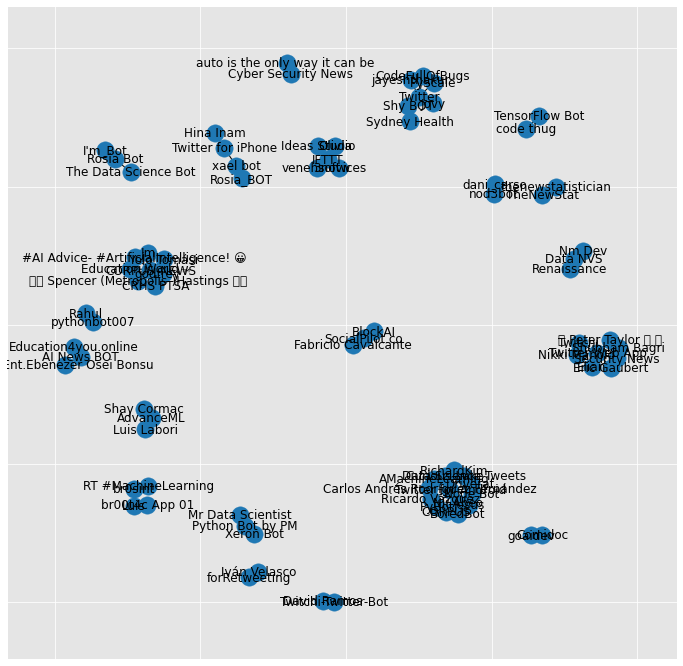

In [109]:
plt.figure(figsize = (12,12))
nx.draw_networkx(G,with_labels= True)

In [110]:
community.greedy_modularity_communities(G)

[frozenset({'AMachineLearning',
            'BoredBot',
            'CORPUS',
            'Carlos Andrés Rodríguez Fernández',
            'Curious Luke',
            'Data Science Tweets',
            'Driveraf',
            'Jesus',
            'Nii Abeo',
            'Node Bot',
            'PyBot',
            'Ricardo Vázquez',
            'RichardKim',
            'Twitter for Android'}),
 frozenset({'Elian',
            'Eric Gaubert',
            'Nikki Manolo',
            'Security News',
            'Shubham Bagri',
            'Twitchi',
            'Twitter Web App',
            '🌊 Peter Taylor 💙 🌎'}),
 frozenset({'#AI Advice- #ArtificialIntelligence! 😀',
            'CORPUS_NEWS',
            'CRHS PTSA',
            'Education World',
            'Jm',
            'Yolo Tomási',
            'godfrey™',
            '🐳🦚 Spencer (Metropolis-)Hastings 🦚🐳'}),
 frozenset({'CodeFullOfBugs',
            'Jovy',
            'PyScale',
            'Shy BOT',
            'Sydney He

### 6. Find the cliques in the network

In [111]:
def find_community(graph,k):
    return list(community.k_clique_communities(graph,k))

for k in range(2,10):
        print ("############# k-Clique: %d ################" % k)
        rst_com = find_community(G,k)
        print ("Count of Community being found：%d" % len(rst_com))
        print(rst_com)

############# k-Clique: 2 ################
Count of Community being found：22
[frozenset({'Shay Cormac', 'AdvanceML', 'Luis Labori'}), frozenset({'thenewstatistician', 'TheNewStat'}), frozenset({'#AI Advice- #ArtificialIntelligence! 😀', 'Yolo Tomási', '🐳🦚 Spencer (Metropolis-)Hastings 🦚🐳', 'Jm', 'godfrey™', 'Education World', 'CORPUS_NEWS', 'CRHS PTSA'}), frozenset({'Twitchi', '🌊 Peter Taylor 💙 🌎', 'Twitter Web App', 'Nikki Manolo', 'Security News', 'Shubham Bagri', 'Eric Gaubert', 'Elian'}), frozenset({"I'm_Bot", 'Rosia Bot', 'The Data Science Bot'}), frozenset({'Olivia', '3novices', 'venehsoftw', 'IFTTT', 'Ideas Studio'}), frozenset({'Nm Dev', 'Data NVS', 'Renaissance'}), frozenset({'Eng.Ent.Ebenezer Osei Bonsu', 'AI News BOT', 'Education4you.online'}), frozenset({'Mr Data Scientist', 'Xeron Bot', 'Python Bot by PM'}), frozenset({'auto is the only way it can be ', 'Cyber Security News'}), frozenset({'Rahul', 'pythonbot007'}), frozenset({'RT #MachineLearning', 'br0sint'}), frozenset({'